## Q1. 

##### 1. 
$$p(y|\beta, X, \Sigma) = MVN(y; X\beta, \Sigma)$$

By Bayes Theorem :

$$p(\beta | y, X, \Sigma) \propto p(y|\beta, X, \Sigma) * p(\beta)$$
$$p(\beta | y, X, \Sigma) \propto p(y|\beta, X, \Sigma) * MVN(\beta_0, \Sigma_{\beta})$$
$$p(\beta | y, X, \Sigma) \propto \exp\left[-\frac{1}{2} (\beta^T X^T \Sigma^{-1} X\beta - 2y^T \Sigma^{-1} X\beta + \beta^T \Sigma_{\beta}^{-1} \beta - 2\beta^T \Sigma_{\beta}^{-1} \beta_0)\right]$$

Let:
$$
A = X^T \Sigma^{-1} X + \Sigma_{\beta}^{-1} \\
b = X^T \Sigma^{-1} y + \Sigma_{\beta}^{-1} \beta_0 \
$$

Then :
$$p(\beta | y, X, \Sigma) \propto \exp\left[-\frac{1}{2} (\beta^T A \beta - 2\beta^T b)\right]$$
$$\beta \sim MVN(A^{-1}b, A^{-1})$$

##### 2.
Assume an inverse-gamma prior distribution for $\sigma^2$:

$$ p(\sigma^2) = \frac{(b^*)^{a^*}}{\Gamma(a^*)} (\sigma^2)^{-(a^*+1)} \exp\left(-\frac{b^*}{\sigma^2}\right) $$
$$ p(y|\beta, \sigma^2, X) = (2\pi\sigma^2)^{-n/2} \exp\left(-\frac{1}{2\sigma^2} (y-X\beta)^T (y-X\beta)\right)$$
$$p(\sigma^2|y, X, \beta) \propto p(y|\beta, \sigma^2) p(\sigma^2)$$
$$p(\sigma^2|y, X, \beta) \propto (\sigma^2)^{-n/2} \exp\left(-\frac{1}{2\sigma^2} (y-X\beta)^T (y-X\beta)\right) (\sigma^2)^{-(a^*+1)} \exp\left(-\frac{b^*}{\sigma^2}\right)$$
$$ p(\sigma^2|y, X, \beta) \propto (\sigma^2)^{-(n/2 + a^* + 1)} \exp\left(-\frac{1}{\sigma^2} \left(\frac{1}{2} (y-X\beta)^T (y-X\beta) + b^*\right)\right) $$

Let:

$$ a_n = \frac{n}{2} + a^*  \\
b_n = \frac{1}{2} (y-X\beta)^T (y-X\beta) + b^* $$

Then:

$$ p(\sigma^2|y, X, \beta) \propto (\sigma^2)^{-(a_n+1)} \exp\left(-\frac{b_n}{\sigma^2}\right) $$
$$\sigma^2 \sim \text{Inv-Gamma}(a_n, b_n)$$

## Q2.

Investing the relationship betweeen BMI and diabetes disease progression using the Sklearn diabetes dataset.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/Users/tara/projects/bayesian-analysis/.venv/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


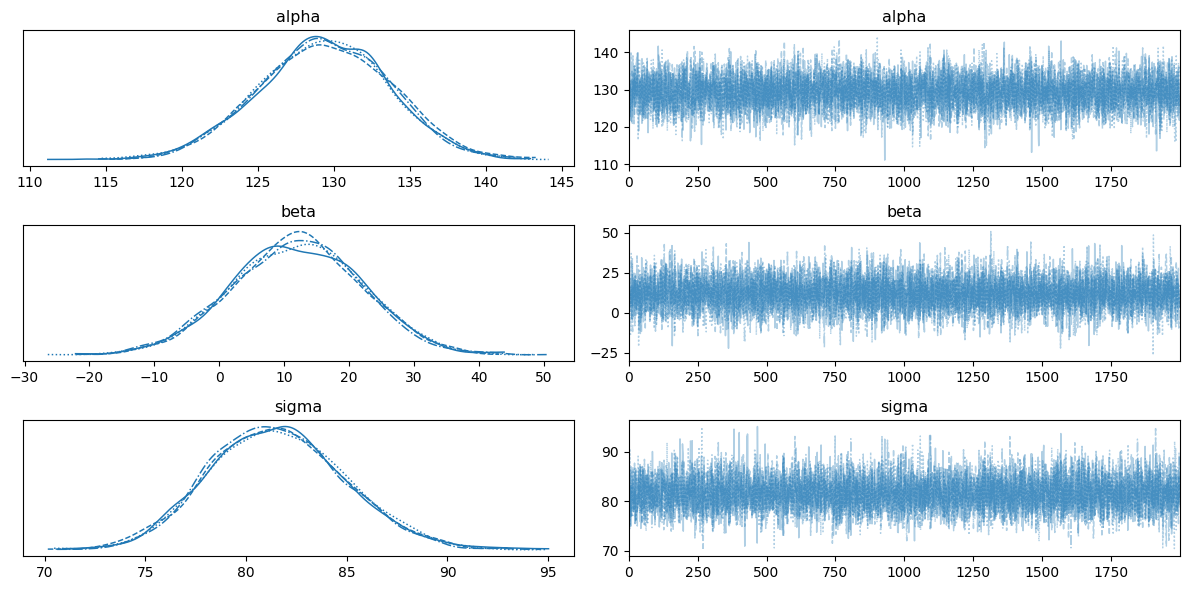

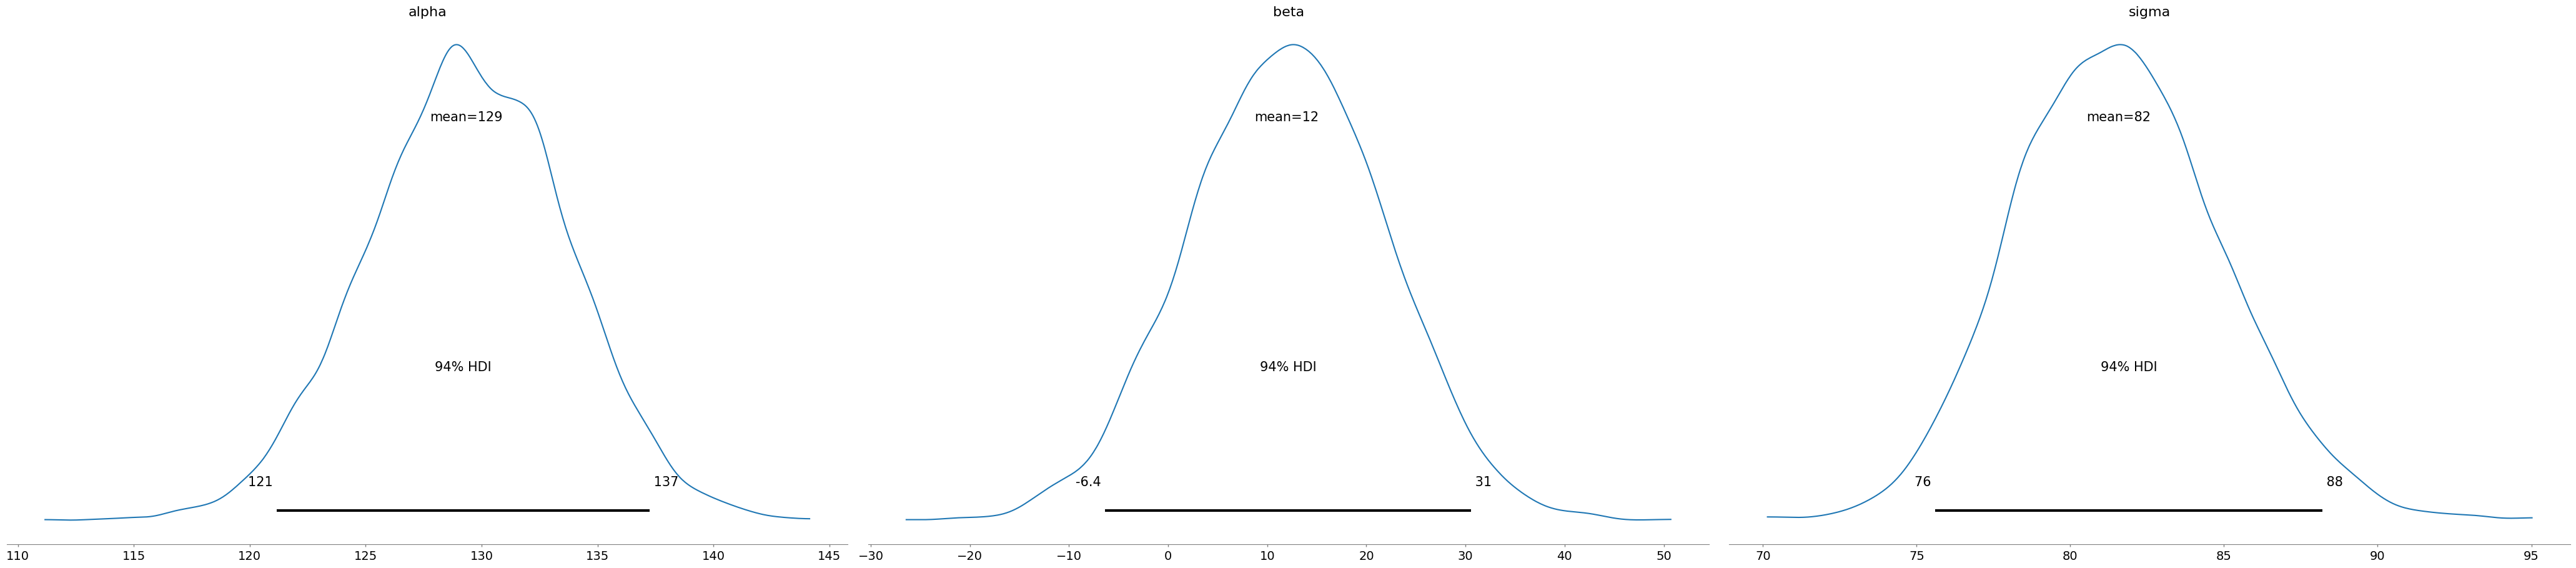

         mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  129.34  4.32  121.16   137.23       0.05     0.04   8113.20   6323.35   
beta    11.94  9.97   -6.38    30.56       0.09     0.11  11514.97   6575.50   
sigma   81.56  3.38   75.60    88.20       0.04     0.04   8492.29   6338.16   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

data = load_diabetes()
features = data.data[:, 2].reshape(-1, 1)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
X_train_flat = X_train.flatten()

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfCauchy('sigma', beta=5)
    mu = alpha + beta * X_train_flat

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y_train)
    trace = pm.sample(2000, return_inferencedata=True, tune=1000)

plt.rcParams['figure.figsize'] = [12, 8]

az.plot_trace(trace)
plt.tight_layout()
plt.show()

az.plot_posterior(trace, var_names=['alpha', 'beta', 'sigma'])
plt.tight_layout()
plt.show()

print(az.summary(trace, round_to=2))

## Q3.

Add noise to the diabetes dataset. 

In [ ]:
np.random.seed(42)
outlier_indices = np.random.choice(len(X_train_flat), size=5, replace=False)
y_train[outlier_indices] += np.random.normal(loc=50, scale=20, size=5)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, tau, tau_i]


/Users/tara/projects/bayesian-analysis/.venv/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


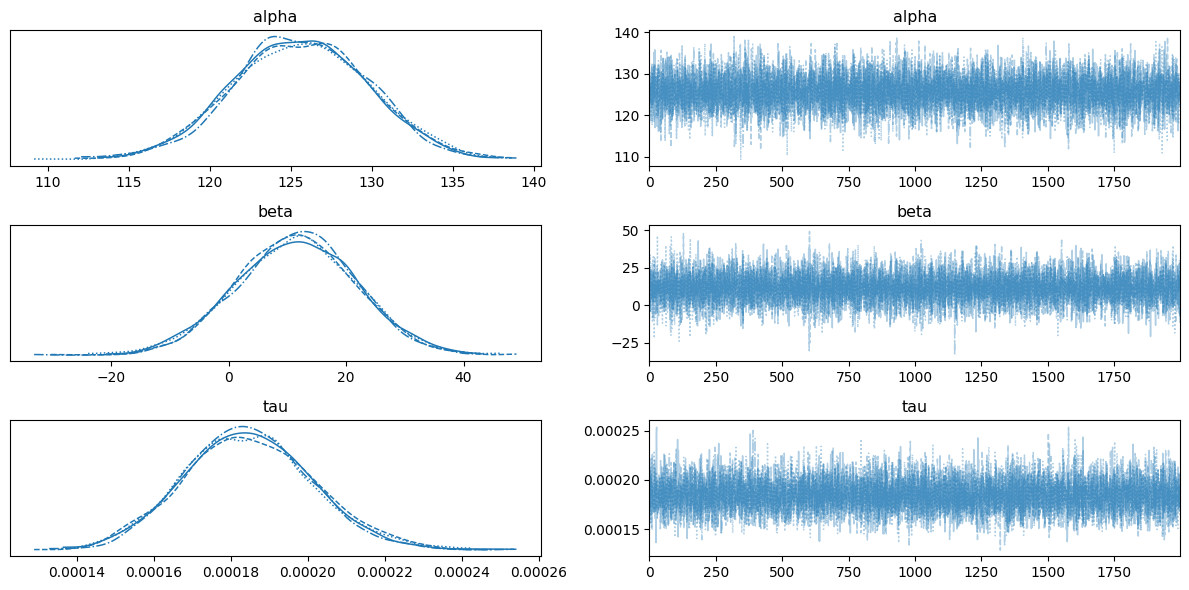

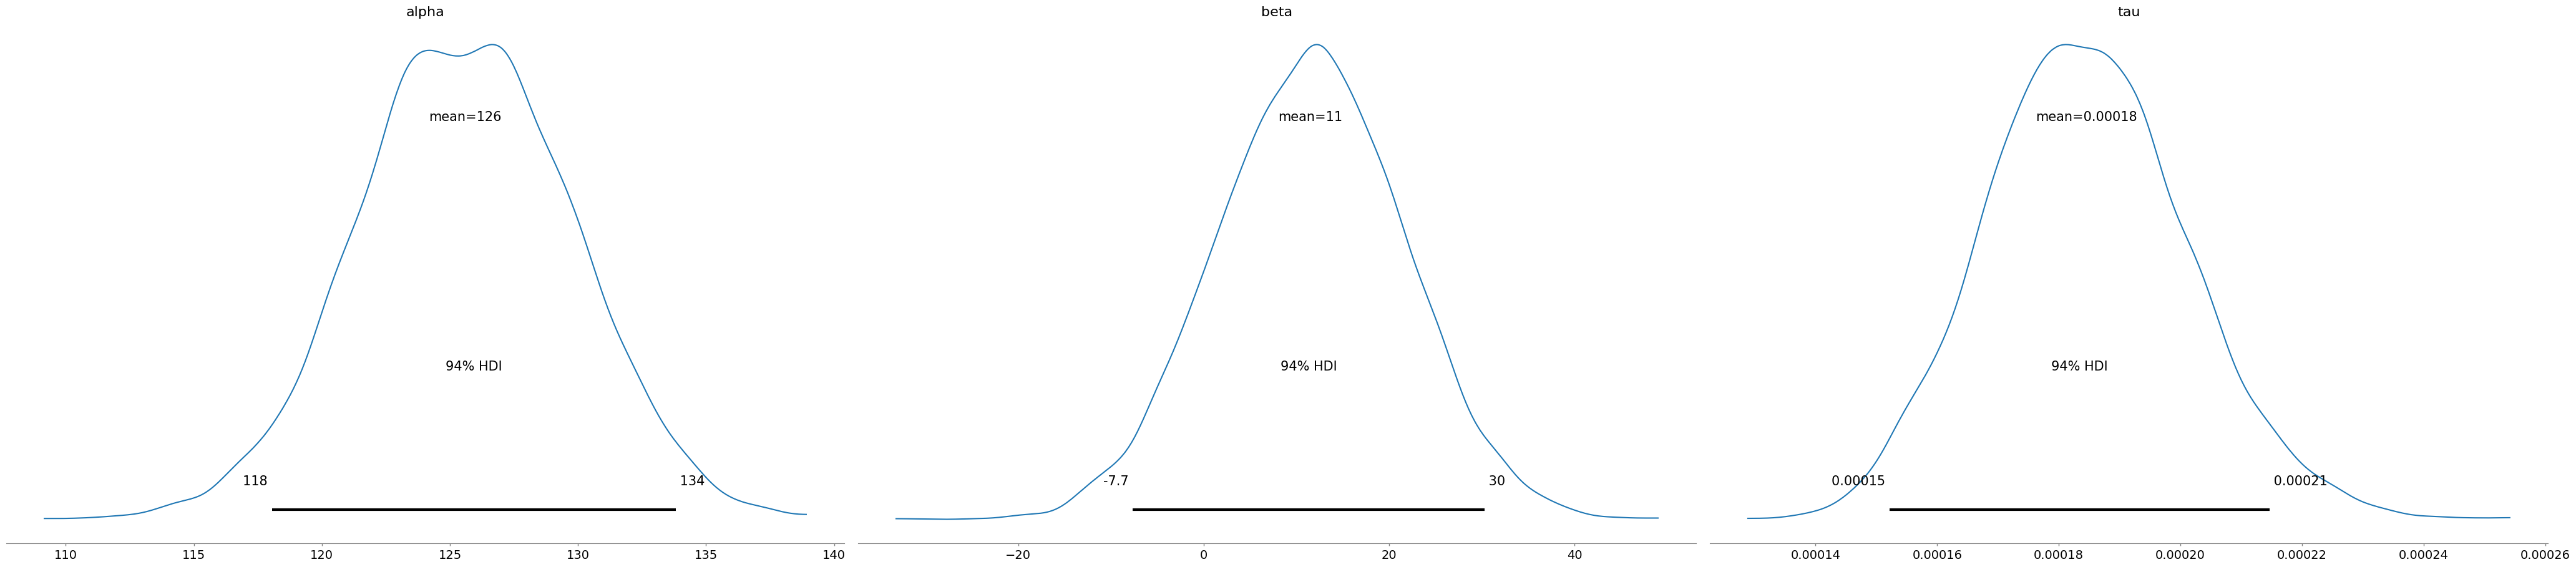

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  125.61   4.20  118.05   133.82       0.04     0.05  13375.20   6437.50   
beta    11.50  10.12   -7.65    30.30       0.07     0.13  18804.66   6148.82   
tau      0.00   0.00    0.00     0.00       0.00     0.00  11847.14   6681.52   

       r_hat  
alpha    1.0  
beta     1.0  
tau      1.0  


In [14]:
v = 7
with pm.Model() as robust_model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    tau = pm.Gamma('tau', alpha=v / 2, beta=v / 2)
    tau_i = pm.Gamma('tau_i', alpha=v / 2, beta=v / 2, shape=len(X_train_flat))
    mu = alpha + beta * X_train_flat
    precision = tau * tau_i
    Y_obs = pm.Normal('Y_obs', mu=mu, tau=precision, observed=y_train)
    robust_trace = pm.sample(2000, return_inferencedata=True, tune=1000)

plt.rcParams['figure.figsize'] = [12, 8]

az.plot_trace(robust_trace, var_names=['alpha', 'beta', 'tau'])
plt.tight_layout()
plt.show()

az.plot_posterior(robust_trace, var_names=['alpha', 'beta', 'tau'])
plt.tight_layout()
plt.show()

print(az.summary(robust_trace, var_names=['alpha', 'beta', 'tau'], round_to=2))